In [3]:
import csv

with open('Patient_Status.csv', newline='') as csvfile:
    data = list(csv.reader(csvfile))

data

[['PATNO',
  'RECRUITMENT_CAT',
  'IMAGING_CAT',
  'ENROLL_DATE',
  'ENROLL_CAT',
  'ENROLL_STATUS',
  'DESCRP_CAT',
  'STATUS_DATE'],
 ['10362', 'PRODROMA', 'PRODROMA', '', '', 'Excluded', 'HYP', '08/2013'],
 ['10405', 'PRODROMA', 'PRODROMA', '', '', 'Excluded', 'HYP', '09/2014'],
 ['10496', 'PRODROMA', 'PRODROMA', '', '', 'Excluded', 'HYP', '06/2013'],
 ['10606', 'PRODROMA', 'no image', '', '', 'Declined', 'HYP', '08/2013'],
 ['10662', 'PRODROMA', 'PRODROMA', '', '', 'Excluded', 'HYP', '06/2014'],
 ['10663', 'PRODROMA', 'PRODROMA', '', '', 'Excluded', 'HYP', '07/2013'],
 ['10672', 'PRODROMA', 'PRODROMA', '', '', 'Declined', 'HYP', '12/2013'],
 ['10765', 'PRODROMA', 'PRODROMA', '', '', 'Declined', 'HYP', '08/2013'],
 ['10775', 'PRODROMA', 'PRODROMA', '', '', 'Excluded', 'HYP', '07/2013'],
 ['10874',
  'PRODROMA',
  'PRODROMA',
  '09/2014',
  'PRODROMA',
  'Withdrew',
  'HYP',
  '05/2020'],
 ['10939', 'PRODROMA', 'PRODROMA', '', '', 'Excluded', 'HYP', '09/2013'],
 ['11247', 'PRODROMA',

In [4]:
healthy_patient=[]
unhealthy_patient=[]
for i in range(1,len(data)):
    if data[i][1]=='HC':
        healthy_patient.append(int(data[i][0]))
    else:
        unhealthy_patient.append(int(data[i][0]))
        
print(len(healthy_patient))
print(len(unhealthy_patient))

241
2010


In [5]:
with open('Blood_Chemistry___Hematology.csv', newline='') as csvfile:
    blood_data = list(csv.reader(csvfile))

len(blood_data)

217513

In [6]:
healthy_blood_data=[]
unique_healthy_db=[]

for i in range(1,len(blood_data)):
    if int(blood_data[i][0]) in healthy_patient:
        healthy_blood_data.append(blood_data[i])
        if int(blood_data[i][0]) not in unique_healthy_db:
            unique_healthy_db.append(int(blood_data[i][0]))


In [7]:
healthy_blood_data
len(unique_healthy_db)

232

In [8]:
unhealthy_blood_data=[]
unique_unhealthy_db=[]

for i in range(1,len(blood_data)):
    if int(blood_data[i][0]) in unhealthy_patient:
        unhealthy_blood_data.append(blood_data[i])
        if int(blood_data[i][0]) not in unique_unhealthy_db:
            unique_unhealthy_db.append(int(blood_data[i][0]))


In [9]:
unhealthy_blood_data
len(unique_unhealthy_db)

1782

Putin study:

- 241 HC

- 232 have had the blood tests

- These include 4/5 results that the Putin study found to be most significant for age prediction 

- We considered as an initial step to work on the blood works data etc, potentially following the work of the Putin study and then integrate MRI images into this

### Healthy v.s. Unhealthy

The rest 1782 unhealthy samples, can be used to discern which features are particularly for healthy patients. In particular, say a blood chemical A level has no significant difference between healthy and unhealthy individuals, then this may be a general trait a person has, which may also be meaningful. Blood chemical's that are indeed different between healthy and unhealthy individuals may specifically help us find aging signals for healthy people. Knowing which category a blood chemical belong to, is an important information in itself.

In [10]:
import sqlite3
import csv
import os
import numpy as np


import pandas as pd

data = pd.read_csv ('Blood_Chemistry___Hematology.csv')   
df = pd.DataFrame(data)

print(df)



        PATNO EVENT_ID PAG_NAME  LCOLLDT    COLLTM   LRECDT     RECTM  \
0        3404       SC  COVANCE  06/2010  10:30:00  06/2010  04:56:00   
1        3404       SC  COVANCE  06/2010  10:30:00  06/2010  04:56:00   
2        3404       SC  COVANCE  06/2010  10:30:00  06/2010  04:56:00   
3        3404       SC  COVANCE  06/2010  10:30:00  06/2010  04:56:00   
4        3404       SC  COVANCE  06/2010  10:30:00  06/2010  04:56:00   
...       ...      ...      ...      ...       ...      ...       ...   
217507  60134       SC  COVANCE  10/2014  10:00:00  10/2014  07:00:00   
217508  60134       SC  COVANCE  10/2014  10:00:00  10/2014  07:00:00   
217509  60134       SC  COVANCE  10/2014  10:00:00  10/2014  07:00:00   
217510  60134       SC  COVANCE  10/2014  10:00:00  10/2014  07:00:00   
217511  60134       SC  COVANCE  10/2014  10:00:00  10/2014  07:00:00   

         LRPTDT     RPTTM  LABCODE  ... LSIRES LSIUNIT LSILORNG LSIHIRNG  \
0       06/2010  22:14:00  COVANCE  ...   10.1 

In [11]:
def filter_rows_by_values(df, col, values):
    return df[df[col].isin(values) == True]
df_healthy=filter_rows_by_values(df,"PATNO", healthy_patient)
df_healthy

,PATNO,EVENT_ID,PAG_NAME,LCOLLDT,COLLTM,LRECDT,RECTM,LRPTDT,RPTTM,LABCODE,...,LSIRES,LSIUNIT,LSILORNG,LSIHIRNG,LUSRES,LUSUNIT,LUSLORNG,LUSHIRNG,LRESFLG,LTSTCOMM
0,3404,SC,COVANCE,06/2010,10:30:00,06/2010,04:56:00,06/2010,22:14:00,COVANCE,...,10.1,sec,9.70,12.30,10.1,sec,9.70,12.30,NaN,NaN
1,3404,SC,COVANCE,06/2010,10:30:00,06/2010,04:56:00,06/2010,22:14:00,COVANCE,...,21.0,sec,22.80,31.00,21.0,sec,22.80,31.00,L,NaN
2,3404,SC,COVANCE,06/2010,10:30:00,06/2010,04:56:00,06/2010,17:28:00,COVANCE,...,0.28,GI/L,0.12,0.92,0.28,x10^3/uL,0.12,0.92,NaN,NaN
3,3404,SC,COVANCE,06/2010,10:30:00,06/2010,04:56:00,06/2010,17:28:00,COVANCE,...,0.09,GI/L,0.00,0.57,0.09,x10^3/uL,0.00,0.57,NaN,NaN
4,3404,SC,COVANCE,06/2010,10:30:00,06/2010,04:56:00,06/2010,17:28:00,COVANCE,...,0.03,GI/L,0.00,0.20,0.03,x10^3/uL,0.00,0.20,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212005,4105,SC,COVANCE,12/2012,10:45:00,12/2012,04:48:00,12/2012,15:56:00,COVANCE,...,3.3,mmol/L,3.40,5.40,3.3,mEq/L,3.40,5.40,L,NaN
212006,4105,V10,COVANCE,11/2016,09:37:00,11/2016,05:00:00,11/2016,08:00:00,COVANCE,...,4.5,mmol/L,3.40,5.40,4.5,mEq/L,3.40,5.40,NaN,NaN
215862,3274,U01,COVANCE,08/2011,12:50:00,08/2011,04:47:00,NaN,NaN,COVANCE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Group ordered to complete visit requirements.
216433,3300,V03,COVANCE,11/2011,16:00:00,11/2011,04:54:00,NaN,NaN,COVANCE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Group ordered to complete visit requirements.


In [12]:
df_unhealthy=filter_rows_by_values(df,"PATNO", unhealthy_patient)
df_unhealthy

,PATNO,EVENT_ID,PAG_NAME,LCOLLDT,COLLTM,LRECDT,RECTM,LRPTDT,RPTTM,LABCODE,...,LSIRES,LSIUNIT,LSILORNG,LSIHIRNG,LUSRES,LUSUNIT,LUSLORNG,LUSHIRNG,LRESFLG,LTSTCOMM
33,3400,SC,COVANCE,06/2010,10:50:00,06/2010,04:53:00,06/2010,20:57:00,COVANCE,...,9.6,sec,9.70,12.30,9.6,sec,9.70,12.30,L,NaN
34,3400,SC,COVANCE,06/2010,10:50:00,06/2010,04:53:00,06/2010,20:57:00,COVANCE,...,25.6,sec,22.80,31.00,25.6,sec,22.80,31.00,NaN,NaN
35,3400,SC,COVANCE,06/2010,10:50:00,06/2010,04:53:00,06/2010,15:36:00,COVANCE,...,0.40,GI/L,0.12,0.92,0.40,x10^3/uL,0.12,0.92,NaN,NaN
36,3400,SC,COVANCE,06/2010,10:50:00,06/2010,04:53:00,06/2010,15:36:00,COVANCE,...,0.10,GI/L,0.00,0.57,0.10,x10^3/uL,0.00,0.57,NaN,NaN
37,3400,SC,COVANCE,06/2010,10:50:00,06/2010,04:53:00,06/2010,14:02:00,COVANCE,...,0.04,GI/L,0.00,0.20,0.04,x10^3/uL,0.00,0.20,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217507,60134,SC,COVANCE,10/2014,10:00:00,10/2014,07:00:00,NaN,NaN,COVANCE,...,NaN,umol/L,NaN,NaN,NaN,mg/dL,NaN,NaN,NaN,discarded per instructions
217508,60134,SC,COVANCE,10/2014,10:00:00,10/2014,07:00:00,NaN,NaN,COVANCE,...,NaN,umol/L,NaN,NaN,NaN,mg/dL,NaN,NaN,NaN,discarded per instructions
217509,60134,SC,COVANCE,10/2014,10:00:00,10/2014,07:00:00,NaN,NaN,COVANCE,...,NaN,g/L,NaN,NaN,NaN,g/dL,NaN,NaN,NaN,discarded per instructions
217510,60134,SC,COVANCE,10/2014,10:00:00,10/2014,07:00:00,NaN,NaN,COVANCE,...,NaN,mmol/L,NaN,NaN,NaN,mg/dL,NaN,NaN,NaN,discarded per instructions


### Unhealthy vs Healthy blood chemical distributions

In [13]:
import sqlite3
import csv
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

blood_data = pd.read_csv ('clean_blood_test_all.csv')   
all_patients = pd.DataFrame(blood_data)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/i

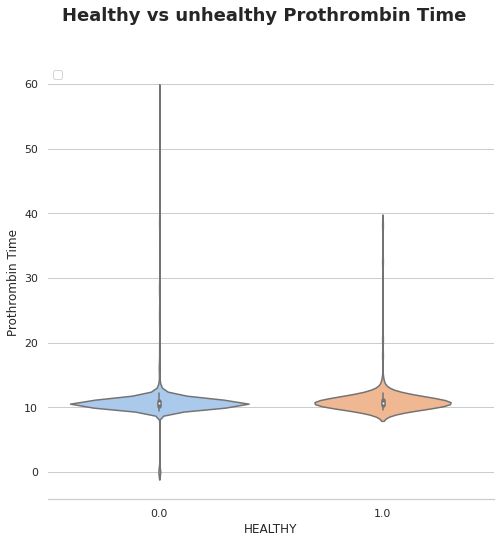

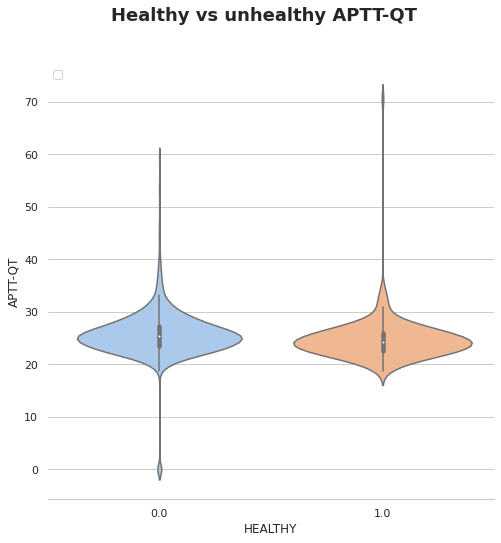

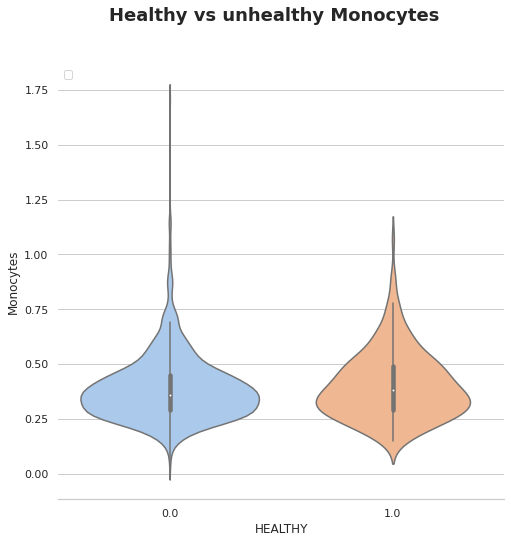

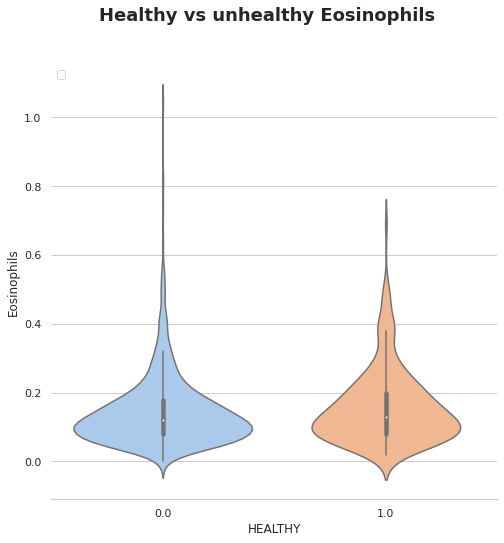

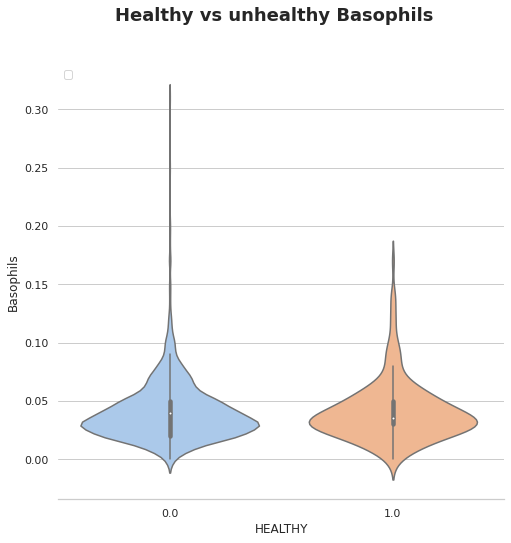

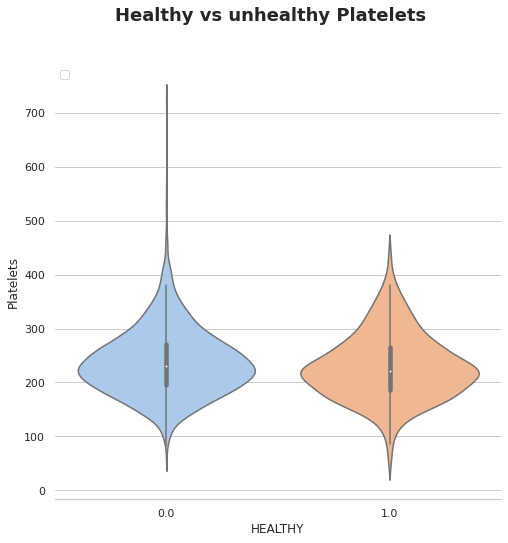

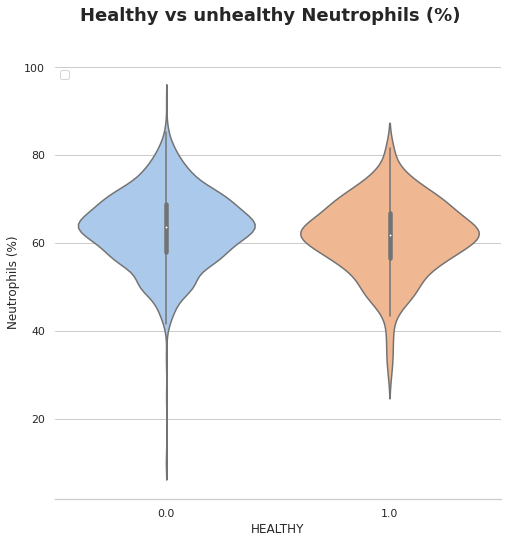

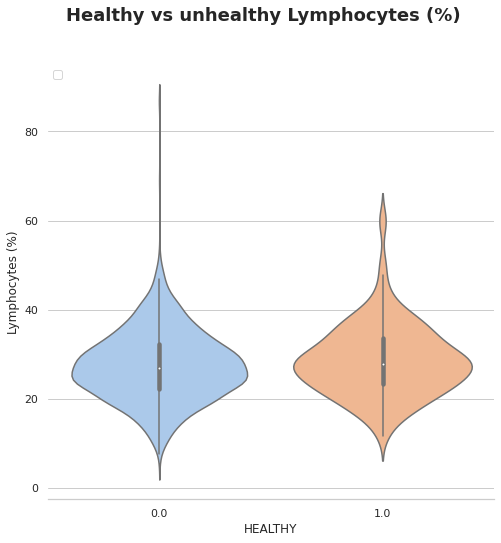

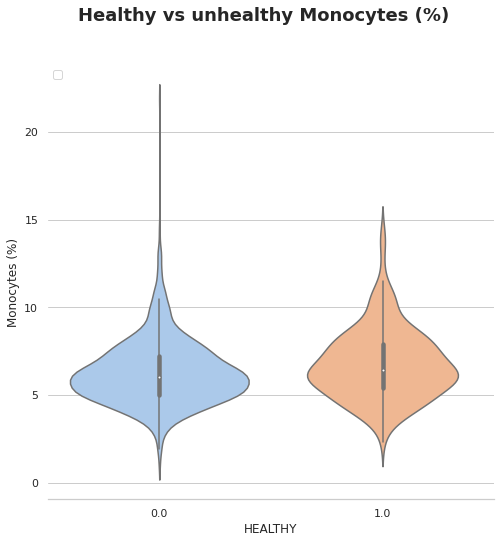

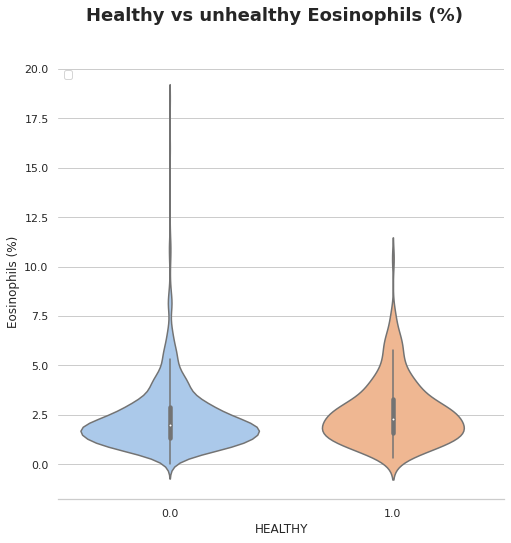

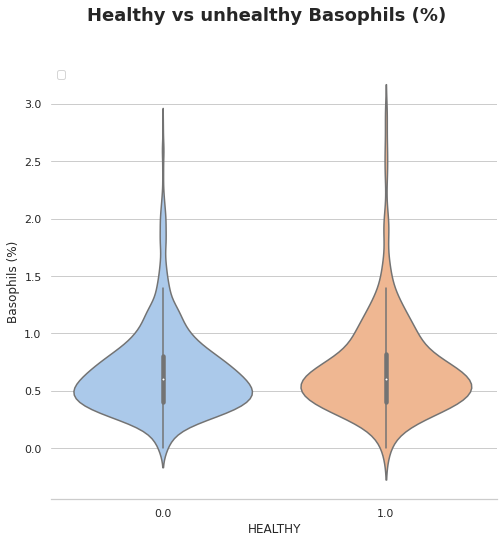

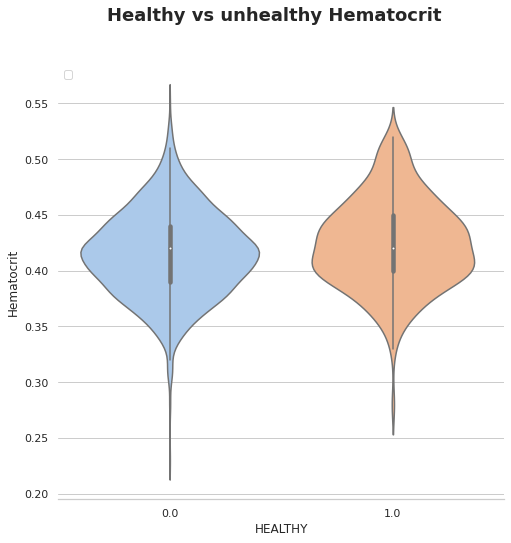

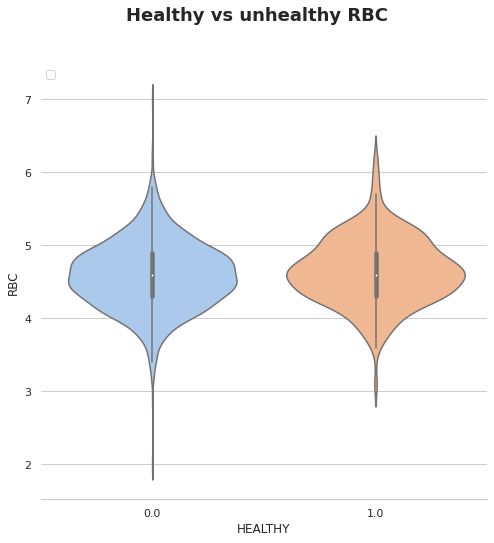

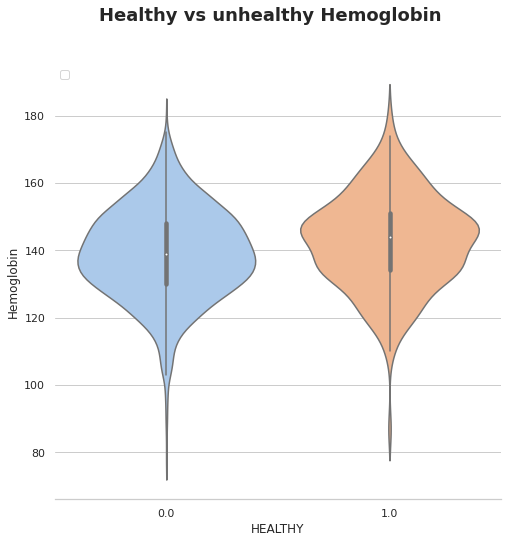

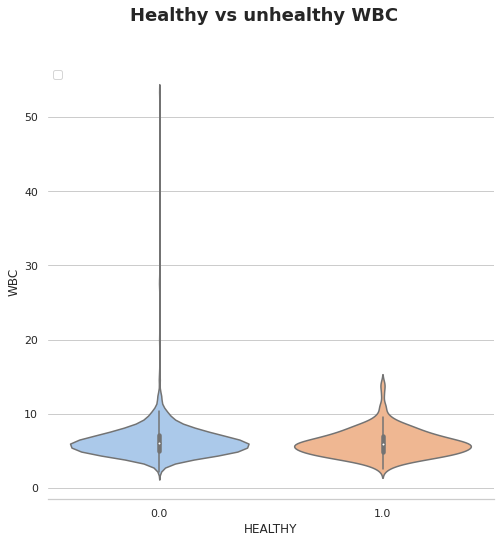

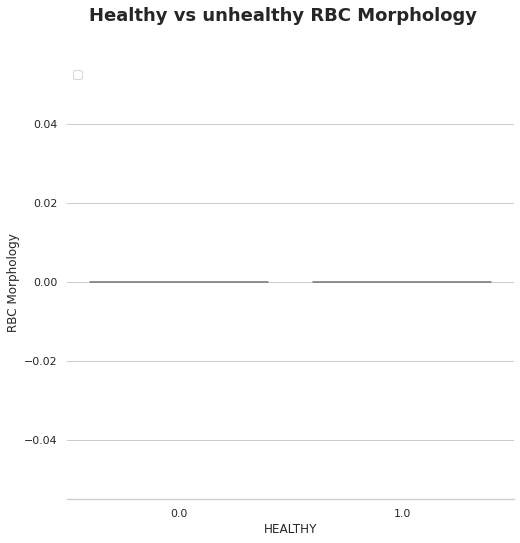

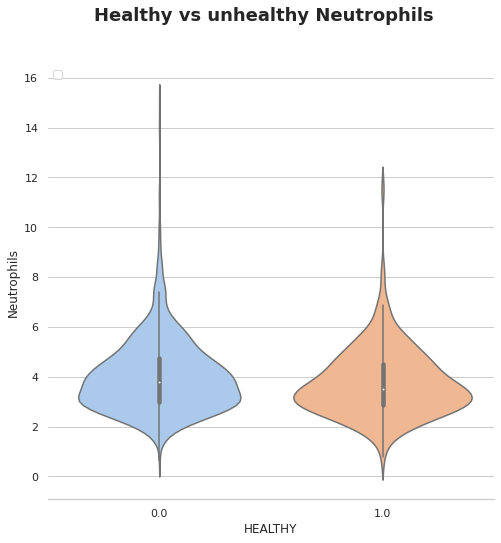

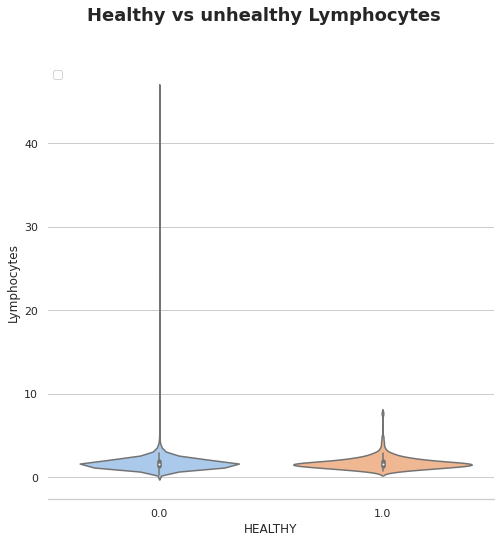

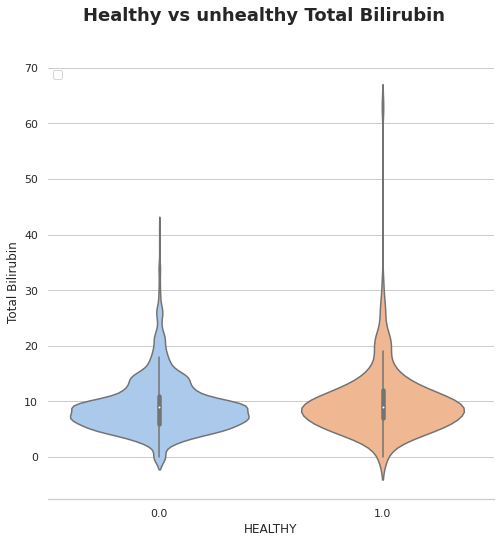

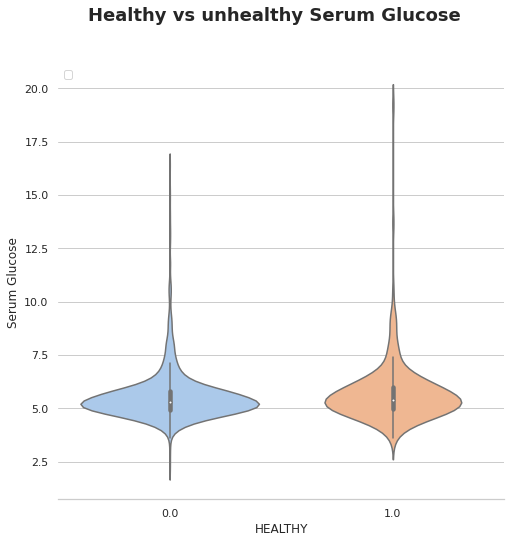

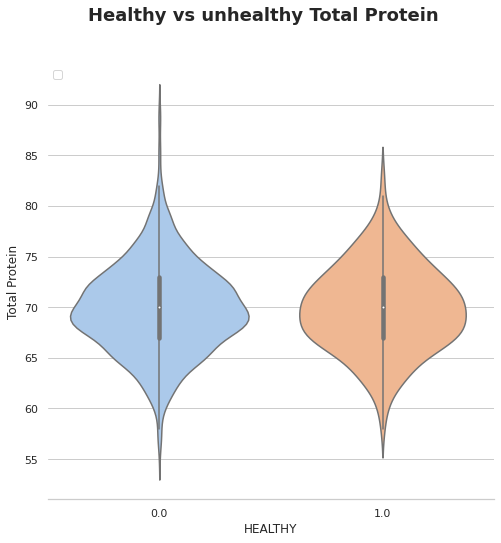

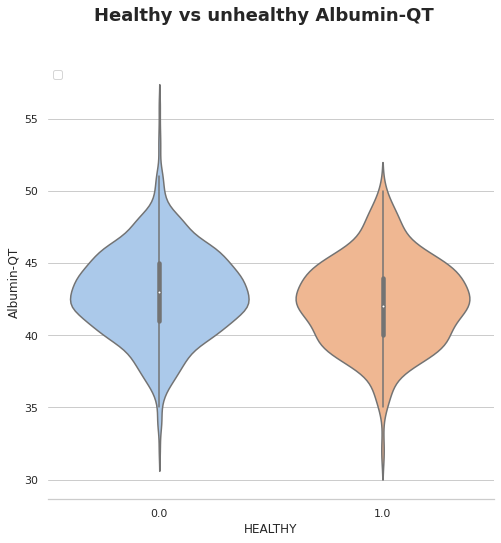

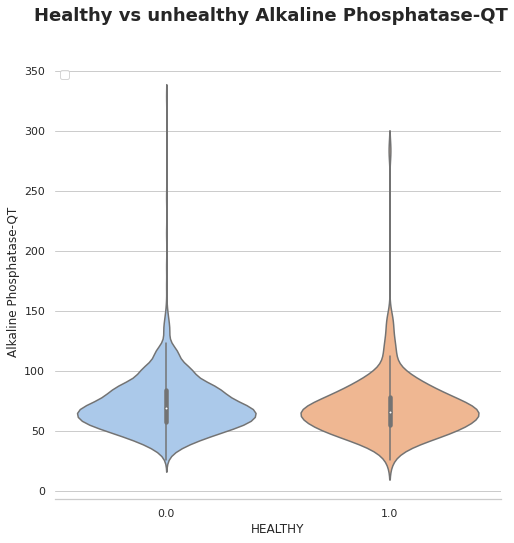

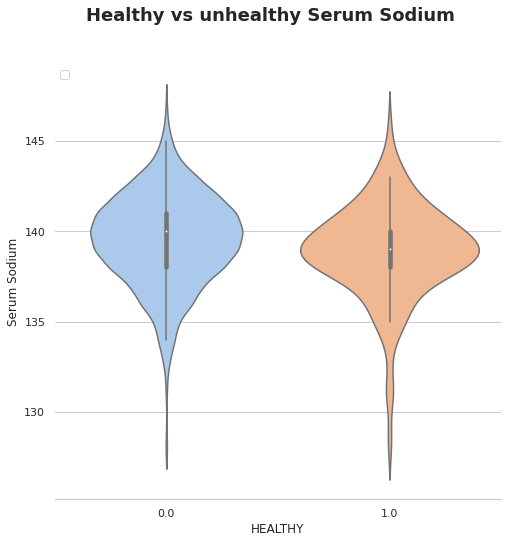

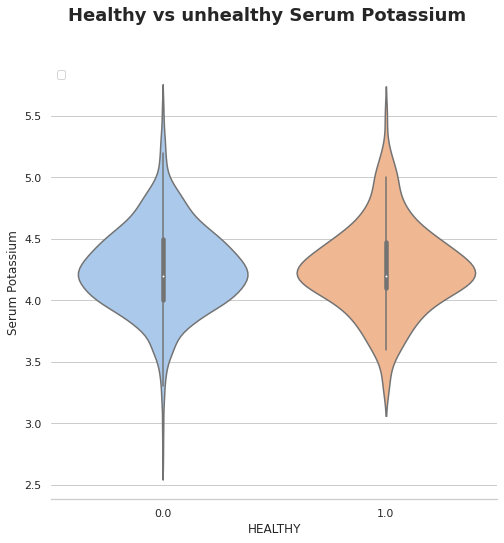

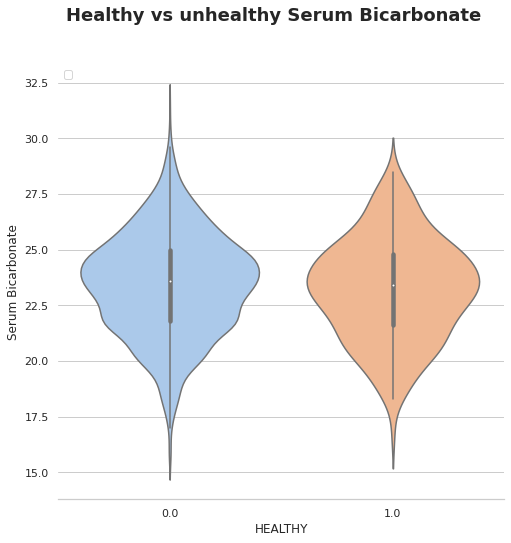

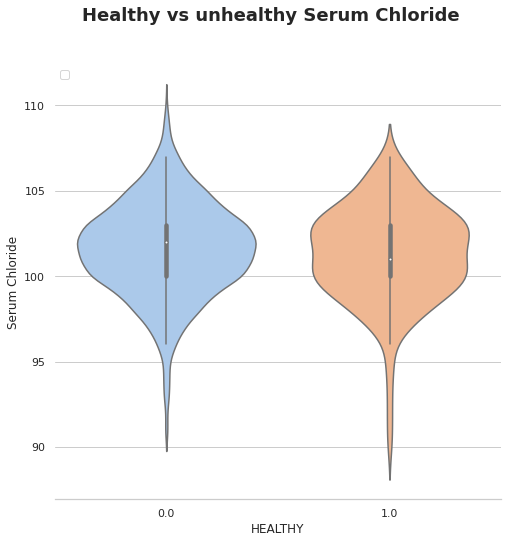

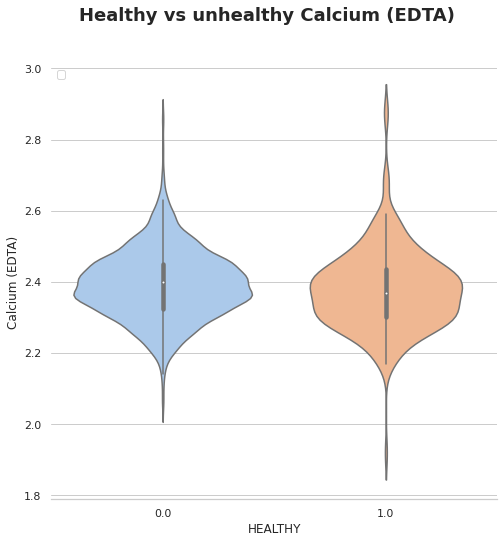

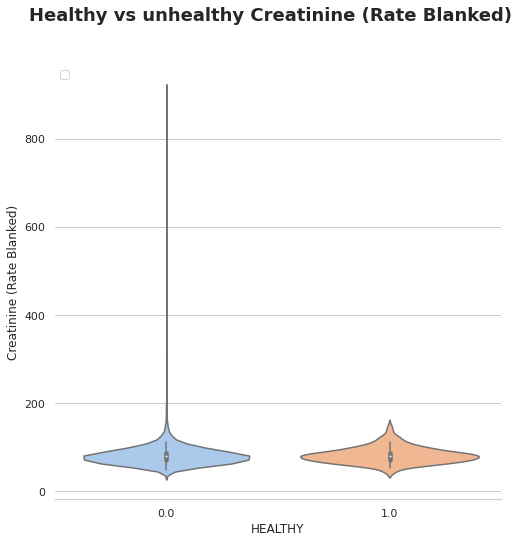

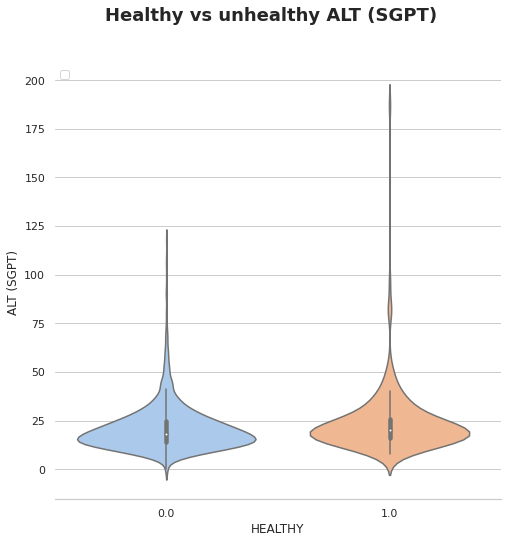

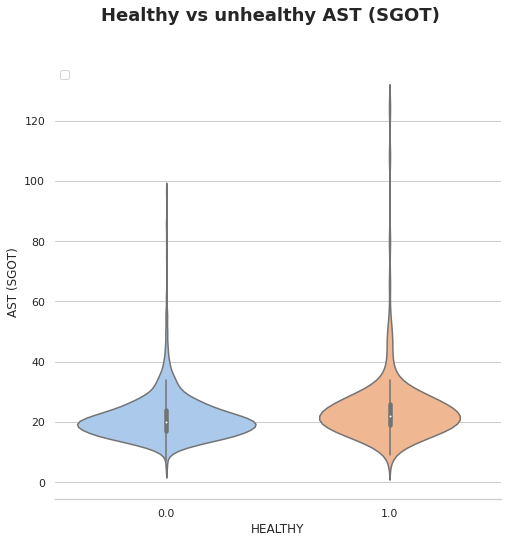

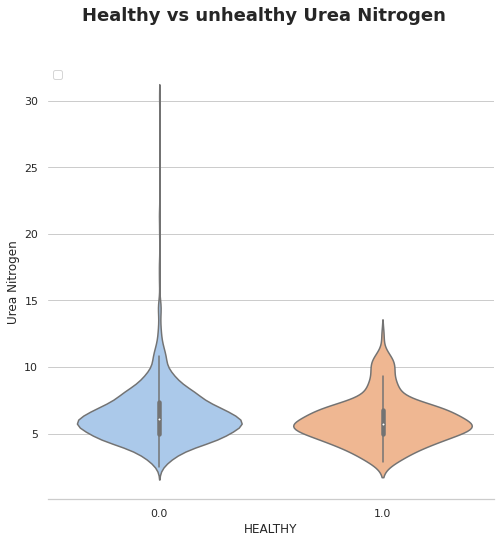

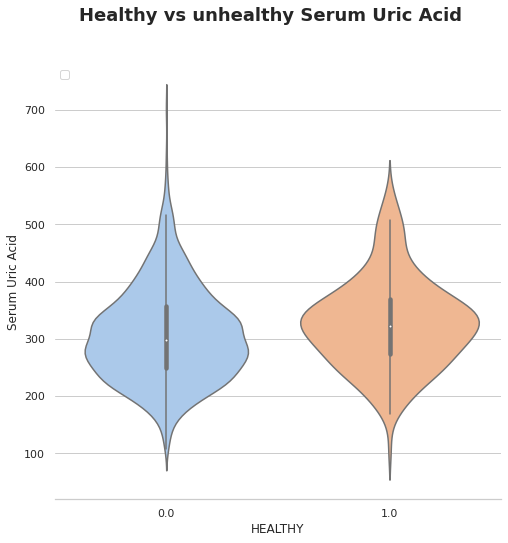

In [14]:
for metric in all_patients.columns[4:]:
    sns.set(style="whitegrid", palette="pastel", color_codes=True)

    f, ax = plt.subplots(figsize=(8, 8))
    sns.violinplot(x="HEALTHY", y=metric, data=all_patients)
    sns.despine(left=True)

    f.suptitle('Healthy vs unhealthy '+metric, fontsize=18, fontweight='bold')
    plt.legend(loc='upper left')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b924cd70-4ac3-479b-ad45-f79f559155a8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>